In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define column names for the DataFrame
columns = ['#','Country', 'CO2 Emissions (tons, 2016)', '1 Year Change', 'Population (2016)', 'Per capita', 'Share of world']

# Make a request to the website and get the response
url = 'https://www.worldometers.info/co2-emissions/co2-emissions-by-country/'
response = requests.get(url)

# Use BeautifulSoup to parse the HTML content of the response
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table element with the data we want and extract its rows and columns
table = soup.find('table', {'id': 'example2'})
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Create a DataFrame with the extracted data and column names
df = pd.DataFrame(data, columns=columns)

# Remove the first column
df = df.drop(columns=columns[0])

# Add some style to the DataFrame
styled_df = df.style\
    .set_table_styles([{'selector': 'thead',
                        'props': [('background-color', '#40466e'), ('color', 'white')]}])\
    .set_properties(**{'text-align': 'center'})\
    .set_caption('CO2 Emissions by Country')

# Display the styled DataFrame
display(styled_df)


,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,China,"10,432,751,400",-0.28%,"1,414,049,351",7.38,29.18%
1,United States,"5,011,686,600",-2.01%,"323,015,995",15.52,14.02%
2,India,"2,533,638,100",4.71%,"1,324,517,249",1.91,7.09%
3,Russia,"1,661,899,300",-2.13%,"145,275,383",11.44,4.65%
4,Japan,"1,239,592,060",-1.21%,"127,763,265",9.70,3.47%
5,Germany,"775,752,190",1.28%,"82,193,768",9.44,2.17%
6,Canada,"675,918,610",-1.00%,"36,382,944",18.58,1.89%
7,Iran,"642,560,030",2.22%,"79,563,989",8.08,1.80%
8,South Korea,"604,043,830",0.45%,"50,983,457",11.85,1.69%
9,Indonesia,"530,035,650",6.41%,"261,556,381",2.03,1.48%


In [8]:
# Display the styled DataFrame
display(styled_df)

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,China,"10,432,751,400",-0.28%,"1,414,049,351",7.38,29.18%
1,United States,"5,011,686,600",-2.01%,"323,015,995",15.52,14.02%
2,India,"2,533,638,100",4.71%,"1,324,517,249",1.91,7.09%
3,Russia,"1,661,899,300",-2.13%,"145,275,383",11.44,4.65%
4,Japan,"1,239,592,060",-1.21%,"127,763,265",9.70,3.47%
5,Germany,"775,752,190",1.28%,"82,193,768",9.44,2.17%
6,Canada,"675,918,610",-1.00%,"36,382,944",18.58,1.89%
7,Iran,"642,560,030",2.22%,"79,563,989",8.08,1.80%
8,South Korea,"604,043,830",0.45%,"50,983,457",11.85,1.69%
9,Indonesia,"530,035,650",6.41%,"261,556,381",2.03,1.48%


In [9]:
# Sort the DataFrame by 'CO2 Emissions (tons, 2016)' in descending order
df = df.sort_values(by='CO2 Emissions (tons, 2016)', ascending=False)

# Display the styled DataFrame
display(styled_df)

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,China,"10,432,751,400",-0.28%,"1,414,049,351",7.38,29.18%
1,United States,"5,011,686,600",-2.01%,"323,015,995",15.52,14.02%
2,India,"2,533,638,100",4.71%,"1,324,517,249",1.91,7.09%
3,Russia,"1,661,899,300",-2.13%,"145,275,383",11.44,4.65%
4,Japan,"1,239,592,060",-1.21%,"127,763,265",9.70,3.47%
5,Germany,"775,752,190",1.28%,"82,193,768",9.44,2.17%
6,Canada,"675,918,610",-1.00%,"36,382,944",18.58,1.89%
7,Iran,"642,560,030",2.22%,"79,563,989",8.08,1.80%
8,South Korea,"604,043,830",0.45%,"50,983,457",11.85,1.69%
9,Indonesia,"530,035,650",6.41%,"261,556,381",2.03,1.48%


In [10]:
# Convert data type in desired column
df['CO2 Emissions (tons, 2016)'] = pd.to_numeric(df['CO2 Emissions (tons, 2016)'].astype(str).str.replace(',', ''))

# Display the styled DataFrame
display(styled_df)

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,China,"10,432,751,400",-0.28%,"1,414,049,351",7.38,29.18%
1,United States,"5,011,686,600",-2.01%,"323,015,995",15.52,14.02%
2,India,"2,533,638,100",4.71%,"1,324,517,249",1.91,7.09%
3,Russia,"1,661,899,300",-2.13%,"145,275,383",11.44,4.65%
4,Japan,"1,239,592,060",-1.21%,"127,763,265",9.70,3.47%
5,Germany,"775,752,190",1.28%,"82,193,768",9.44,2.17%
6,Canada,"675,918,610",-1.00%,"36,382,944",18.58,1.89%
7,Iran,"642,560,030",2.22%,"79,563,989",8.08,1.80%
8,South Korea,"604,043,830",0.45%,"50,983,457",11.85,1.69%
9,Indonesia,"530,035,650",6.41%,"261,556,381",2.03,1.48%


In [15]:
# Create a styled DataFrame with the highest and lowest values highlighted
styled_df = df.style\
    .set_table_styles([{'selector': 'thead',
                        'props': [('background-color', '#40466e'), ('color', 'white')]}])\
    .set_properties(**{'text-align': 'center'})\
    .set_caption('CO2 Emissions by Country')\
    .highlight_max(subset=['CO2 Emissions (tons, 2016)'], color='red')\
    .highlight_min(subset=['CO2 Emissions (tons, 2016)'], color='green')

# Display the styled DataFrame
display(styled_df)

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
196,British Virgin Islands,99762,1.51%,"29,355",3.40,0.00%
197,Cabo Verde,99687,2.59%,"531,146",0.19,0.00%
39,Qatar,98990085,1.79%,"2,654,374",37.29,0.28%
40,Belgium,94722813,1.53%,"11,354,420",8.34,0.26%
101,Afghanistan,9900004,7.13%,"35,383,032",0.28,0.03%
102,Tanzania,9731560,2.50%,"53,049,230",0.18,0.03%
103,Cameroon,9454331,2.21%,"23,926,551",0.40,0.03%
104,Honduras,9320279,2.25%,"9,270,795",1.01,0.03%
105,Papua New Guinea,9086988,7.09%,"8,271,762",1.10,0.03%
41,Oman,87835773,2.09%,"4,479,219",19.61,0.25%


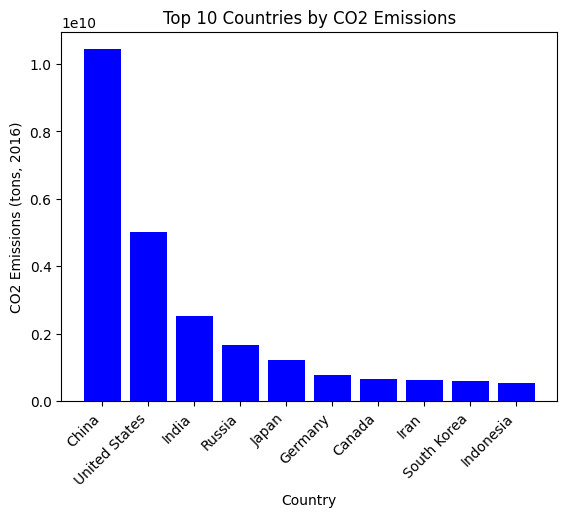

In [12]:
#Visualise data using Bar plot for top 10 countries that produce the most CO2
import matplotlib.pyplot as plt

# Select the top 10 countries by CO2 emissions
top_10 = df.nlargest(10, 'CO2 Emissions (tons, 2016)')

# Create the bar plot
plt.bar(top_10['Country'], top_10['CO2 Emissions (tons, 2016)'], color='blue')

# Add a title and axis labels
plt.title('Top 10 Countries by CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (tons, 2016)')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

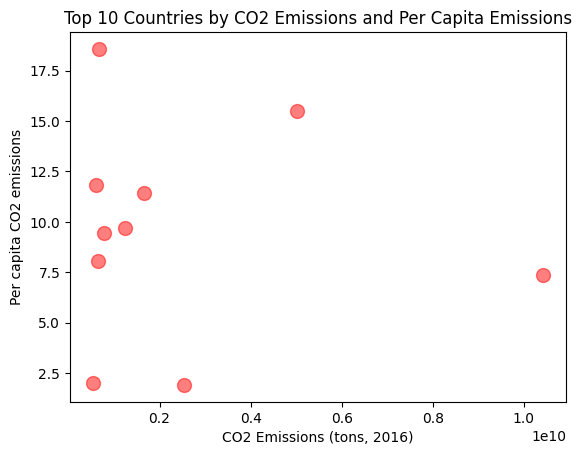

In [13]:
#Visualise data using Scatter plot for top 10 countries producing most CO2 and their respective per capita CO2 emissions
import matplotlib.pyplot as plt

# Select the top 10 countries by CO2 emissions
top_10 = df.nlargest(10, 'CO2 Emissions (tons, 2016)')

# Convert 'Per capita' column to numeric data type
top_10['Per capita'] = pd.to_numeric(top_10['Per capita'])

# Create the scatter plot
plt.scatter(top_10['CO2 Emissions (tons, 2016)'], top_10['Per capita'], s=100, alpha=0.5, c='red')

# Add a title and axis labels
plt.title('Top 10 Countries by CO2 Emissions and Per Capita Emissions')
plt.xlabel('CO2 Emissions (tons, 2016)')
plt.ylabel('Per capita CO2 emissions')

# Show the plot
plt.show()



In [14]:
#Save the data results (tables and plots) in the files (JSON or/and CSV) and/or as Markdown HTML/PDF file in Jupyter
df.to_csv('data.csv', index=False)

with open('data.html', 'w') as f:
    f.write(df.to_markdown())
